# P3 - Movie Genre Classification

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

### Objective

Classify a movie genre based on its plot.
Source: https://www.kaggle.com/c/miia4201-202019-p3-moviegenreclassification/overview

Input: movie plot
Output: Probability of the movie belong to each genre

### Evaluation

- 20% API
- 30% Report with all the details of the solution, the analysis and the conclusions. The report cannot exceed 10 pages, must be send in PDF format and must be self-contained.
- 50% Performance in the Kaggle competition (The grade for each group will be proportional to the ranking it occupies in the competition. The group in the first place will obtain 5 points, for each position below, 0.25 points will be subtracted, that is: first place: 5 points, second: 4.75 points, third place: 4.50 points ... eleventh place: 2.50 points, twelfth place: 2.25 points).

• The project must be carried out in the groups assigned for module 4.
• Use clear and rigorous procedures.
• The delivery of the project is on July 12, 2020, 11:59 pm, through Sicua + (Upload: the API and the report in PDF format).
• No projects will be received after the delivery time or by any other means than the one established. 

### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.
See https://arxiv.org/abs/1702.01992

## Sample Submission

In [42]:
# Librerías

import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer


In [8]:
df_train = pd.read_csv('DataSet/dataTraining.csv', encoding='UTF-8', index_col=0)
df_test = pd.read_csv('Dataset/dataTesting.csv', encoding='UTF-8', index_col=0)

In [9]:
df_train.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [10]:
df_train['rating'] = df_train['rating'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7895 entries, 3107 to 215
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    7895 non-null   int64 
 1   title   7895 non-null   object
 2   plot    7895 non-null   object
 3   genres  7895 non-null   object
 4   rating  7895 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 370.1+ KB


In [11]:
df_test.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3383 entries, 1 to 11275
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    3383 non-null   int64 
 1   title   3383 non-null   object
 2   plot    3383 non-null   object
dtypes: int64(1), object(2)
memory usage: 105.7+ KB


### Limpieza y Normalización

In [13]:
## eliminar caracteres especiales
#spec_chars = ["!",'"',"#","%","&","'","(",")",
#              "*","+",",","-",".","/",":",";","<",
#              "=",">","?","@","[","\\","]","^","_",
#              "`","{","|","}","~","–"]
#cols = df_train.select_dtypes(include=[np.object]).columns
#for char in spec_chars:
#    df_train[cols] = df_train[cols].apply(lambda x: x.str.replace(char, ''))
#    
#cols = df_test.select_dtypes(include=[np.object]).columns
#for char in spec_chars:
#    df_test[cols] = df_test[cols].apply(lambda x: x.str.replace(char, ''))

In [14]:
# eliminar minúsculas
cols = df_train.select_dtypes(include=[np.object]).columns
df_train[cols] = df_train[cols].apply(lambda x: x.str.lower())

cols = df_test.select_dtypes(include=[np.object]).columns
df_test[cols] = df_test[cols].apply(lambda x: x.str.lower())

In [15]:
# eliminar tildes
cols = df_train.select_dtypes(include=[np.object]).columns
df_train[cols] = df_train[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

cols = df_test.select_dtypes(include=[np.object]).columns
df_test[cols] = df_test[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

In [16]:
df_train.head()

,year,title,plot,genres,rating
3107,2003,most,most is the story of a single father who takes...,"['short', 'drama']",8
900,2008,how to be a serial killer,a serial killer decides to teach the secrets o...,"['comedy', 'crime', 'horror']",5
6724,1941,a woman's face,"in sweden , a female blackmailer with a disfi...","['drama', 'film-noir', 'thriller']",7
4704,1954,executive suite,"in a friday afternoon in new york , the presi...",['drama'],7
2582,1990,narrow margin,"in los angeles , the editor of a publishing h...","['action', 'crime', 'thriller']",6


### Descriptive Analysis

In [17]:
print('year:')
df_train['year'].value_counts()

year:


2013    288
2012    277
2009    268
2008    268
2011    266
       ... 
1918      2
1910      1
1914      1
1903      1
1896      1
Name: year, Length: 106, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


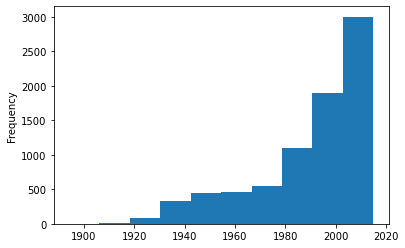

In [18]:
histogram = df_train['year'].plot.hist()
print(histogram)
plt.show()

In [19]:
print('rating:')
df_train['rating'].value_counts()

rating:


6    2851
7    2324
5    1636
4     516
8     349
3     150
2      55
1      11
9       3
Name: rating, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


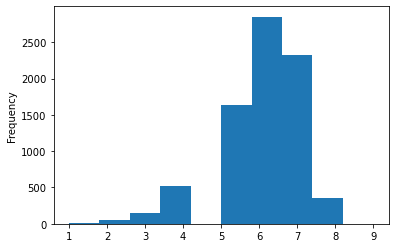

In [20]:
histogram = df_train['rating'].plot.hist()
print(histogram)
plt.show()

### Create count vectorizer


In [21]:
vect = CountVectorizer(max_features=1000)
X_dtm = vect.fit_transform(df_train['plot'])
X_dtm.shape

(7895, 1000)

In [22]:
print(vect.get_feature_names())

['able', 'about', 'accepts', 'accident', 'accidentally', 'across', 'act', 'action', 'actor', 'actress', 'actually', 'adam', 'adult', 'adventure', 'affair', 'after', 'again', 'against', 'age', 'agent', 'ago', 'agrees', 'air', 'alan', 'alex', 'alice', 'alien', 'alive', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'america', 'american', 'among', 'an', 'and', 'angeles', 'ann', 'anna', 'another', 'any', 'anyone', 'anything', 'apartment', 'appears', 'are', 'area', 'army', 'around', 'arrested', 'arrive', 'arrives', 'art', 'artist', 'as', 'asks', 'assigned', 'assistant', 'at', 'attack', 'attempt', 'attempts', 'attention', 'attracted', 'aunt', 'away', 'baby', 'back', 'bad', 'band', 'bank', 'bar', 'based', 'battle', 'be', 'beautiful', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'begin', 'begins', 'behavior', 'behind', 'being', 'believe', 'believes', 'beloved', 'ben', 'best', 'better', 'between', 'beyond', 'big', 'bill', 'billy', 'birthday', 'black

### Create y

In [23]:
df_train['genres'] = df_train['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(df_train['genres'])


In [24]:
y_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [25]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [26]:
X_train

<5289x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 267819 stored elements in Compressed Sparse Row format>

In [27]:
X_test

<2606x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 130363 stored elements in Compressed Sparse Row format>

In [28]:
y_train_genres

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [29]:
y_test_genres

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Train multi-class multi-label model

In [30]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))

In [31]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=42))

In [32]:
y_pred_genres = clf.predict_proba(X_test)

In [33]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.764422401477475

### Predict the testing dataset

In [34]:
X_test_dtm = vect.transform(df_test['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = clf.predict_proba(X_test_dtm)


In [35]:
res = pd.DataFrame(y_pred_test_genres, index=df_test.index, columns=cols)

In [36]:
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.123756,0.103867,0.022934,0.029989,0.366989,0.119883,0.038821,0.516515,0.071927,0.104363,...,0.025385,0.065428,0.000011,0.359025,0.052039,0.008811,0.018552,0.183363,0.021250,0.020424
4,0.129210,0.089728,0.023649,0.083562,0.357282,0.199651,0.092806,0.512687,0.063970,0.067027,...,0.024091,0.060564,0.001466,0.144207,0.059189,0.012512,0.019936,0.208792,0.041162,0.019134
5,0.202882,0.139104,0.015613,0.065951,0.346519,0.484273,0.014112,0.579468,0.066952,0.111810,...,0.022031,0.290749,0.000000,0.380282,0.111593,0.001286,0.046793,0.473437,0.047256,0.036477
6,0.156802,0.115972,0.018002,0.078629,0.341305,0.147089,0.011142,0.589117,0.066103,0.064168,...,0.109783,0.101384,0.000000,0.200932,0.102672,0.001218,0.060744,0.240969,0.089068,0.021008
7,0.186878,0.153099,0.043560,0.032572,0.293750,0.250824,0.011410,0.418683,0.078710,0.155671,...,0.022231,0.088035,0.000000,0.218954,0.246036,0.003571,0.023050,0.256546,0.020322,0.016667


In [37]:
res.to_csv('pred_genres_text_RF.csv', index_label='ID')

### tunning 

In [56]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100, bootstrap=True, random_state=1234)
clf = OneVsRestClassifier(estimator=model_tunning)

In [58]:
# hiperparameters
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 3, 4] # Minimum number of samples required at each leaf node
parameters = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
            }
# grid
model_tunning = GridSearchCV(estimator=rfc, param_grid=parameters, scoring=make_scorer(roc_auc_score), cv=10)

# model
clf.fit(X_train, y_train_genres)

KeyboardInterrupt: 

In [ ]:
print model_tunning.best_score_
print model_tunning.best_params_